In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os

# Configuración
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 7  # angry, disgust, fear, happy, neutral, sad, surprise

# Ruta del dataset (ajusta según tu estructura)
DATASET_PATH = "./Image-Classification-1"  # Cambia por tu ruta
DS_PROCESSED_PATH = "./"

# 1. CONFIGURAR GENERADORES DE DATOS
print("Configurando generadores de datos...")

train_datagen = ImageDataGenerator(rescale=1./255)
# Generador para validación (solo normalización)
val_datagen = ImageDataGenerator(rescale=1./255)

# Generador para test (solo normalización)
test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar datos
train_generator = train_datagen.flow_from_directory(
    os.path.join(DS_PROCESSED_PATH, 'preprocesado'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'valid'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print(f"Clases encontradas: {train_generator.class_indices}")
print(f"Imágenes de entrenamiento: {train_generator.samples}")
print(f"Imágenes de validación: {validation_generator.samples}")
print(f"Imágenes de test: {test_generator.samples}")


Configurando generadores de datos...
Found 2055 images belonging to 7 classes.
Found 197 images belonging to 7 classes.
Found 103 images belonging to 7 classes.
Clases encontradas: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Imágenes de entrenamiento: 2055
Imágenes de validación: 197
Imágenes de test: 103


In [13]:
# 2. DEFINIR ARQUITECTURA DEL MODELO
def create_emotion_model():
    model = Sequential([
        # Primer bloque convolucional
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        
        # Segundo bloque convolucional
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        
        # Tercer bloque convolucional
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        
        # Cuarto bloque convolucional
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        
        # Capas densas
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model


In [14]:
# 3. CREAR Y COMPILAR MODELO
print("Creando modelo...")
model = create_emotion_model()

# Compilar modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar arquitectura
model.summary()


Creando modelo...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 108, 108, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 51, 51, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    15,860,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 16,579,495 (63.25 MB)

 Trainable params: 16,577,511 (63.24 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [15]:

# 4. CONFIGURAR CALLBACKS
callbacks = [
    # Early stopping para evitar overfitting
    EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reducir learning rate cuando el modelo se estanque
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    
    # Guardar el mejor modelo
    ModelCheckpoint(
        'mejor_modelo_emociones.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]


In [16]:

# 5. ENTRENAR MODELO
print("Iniciando entrenamiento...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=callbacks,
)


Iniciando entrenamiento...
Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2389 - loss: 2.6023
Epoch 1: val_accuracy improved from -inf to 0.17188, saving model to mejor_modelo_emociones.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 272s 4s/step - accuracy: 0.2395 - loss: 2.5996 - val_accuracy: 0.1719 - val_loss: 6.0823 - learning_rate: 0.0010
Epoch 2/50
 1/64 ━━━━━━━━━━━━━━━━━━━━ 6:04 6s/step - accuracy: 0.2812 - loss: 2.7923
Epoch 2: val_accuracy improved from 0.17188 to 0.21875, saving model to mejor_modelo_emociones.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.2812 - loss: 2.7923 - val_accuracy: 0.2188 - val_loss: 5.9443 - learning_rate: 0.0010
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2969 - loss: 2.4306
Epoch 3: val_accuracy improved from 0.21875 to 0.31250, saving model to mejor_modelo_emociones.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.2966 - loss: 2.4308 - val_accuracy: 0.3125 - val_loss: 2.1883 - learning_rate: 0.0010


In [24]:

# 6. EVALUAR MODELO
print("Evaluando modelo en conjunto de test...")
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Accuracy en test: {test_accuracy*100:.2f}%")
print(f"Loss en test: {test_loss:.4f}")


Evaluando modelo en conjunto de test...
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 663ms/step - accuracy: 0.7365 - loss: 0.7862
Accuracy en test: 74.76%
Loss en test: 0.7993


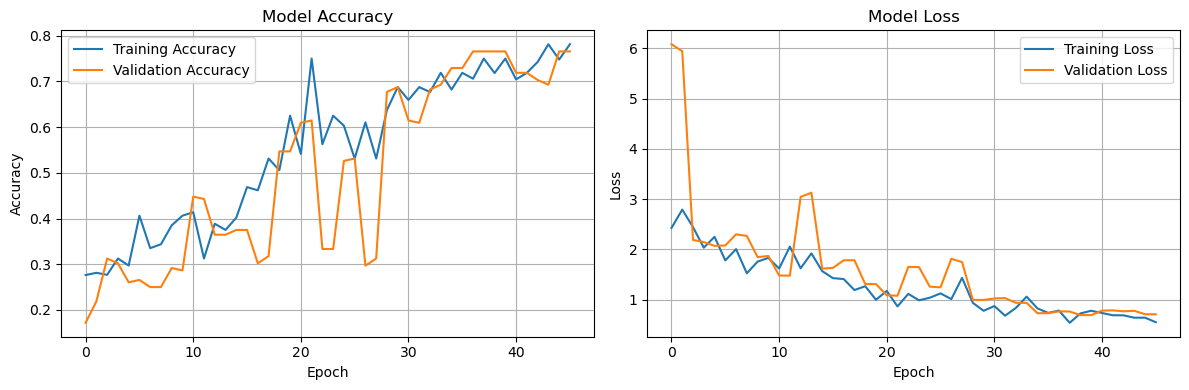

In [18]:

# 7. VISUALIZAR RESULTADOS DEL ENTRENAMIENTO
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)


In [19]:
# 8. FUNCIÓN PARA PREDECIR EMOCIONES EN NUEVAS IMÁGENES
def predict_emotion(model, img_path, class_names):
    """
    Predice la emoción de una imagen
    """
    from tensorflow.keras.preprocessing import image
    
    # Cargar y preprocesar imagen
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Realizar predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]
    
    # Obtener nombre de la clase
    emotion = list(class_names.keys())[list(class_names.values()).index(predicted_class)]
    
    return emotion, confidence

# Obtener nombres de clases
class_names = train_generator.class_indices


In [20]:

# 9. GUARDAR MODELO FINAL
print("Guardando modelo final...")
model.save('modelo_emociones_final.keras')
print("Modelo guardado como 'modelo_emociones_final.h5'")


Guardando modelo final...
Modelo guardado como 'modelo_emociones_final.h5'


In [28]:
# 10. EJEMPLO DE USO
print("\n=== EJEMPLO DE PREDICCIÓN ===")
print("Para usar el modelo en nuevas imágenes:")

# Cargar modelo guardado
modelo = tf.keras.models.load_model('modelo_emociones_final.keras')

# Predecir emoción
emocion, confianza = predict_emotion(modelo, './Image-Classification-1/test/neutral/bs060_N_N_3_png_jpg.rf.2046cfe90cf1fdcaa5421f8ad387d89d.jpg', class_names)
print(f'Emoción detectada: {emocion} (Confianza: {confianza:.2f})')





=== EJEMPLO DE PREDICCIÓN ===
Para usar el modelo en nuevas imágenes:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Emoción detectada: neutral (Confianza: 0.62)


Generando matriz de confusión...
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 690ms/step


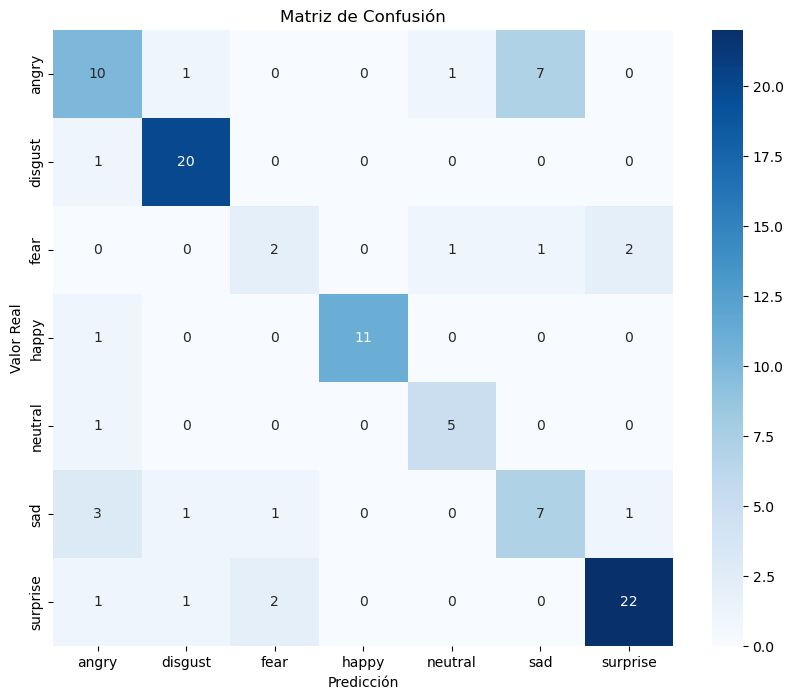


Reporte de clasificación:
              precision    recall  f1-score   support

       angry       0.59      0.53      0.56        19
     disgust       0.87      0.95      0.91        21
        fear       0.40      0.33      0.36         6
       happy       1.00      0.92      0.96        12
     neutral       0.71      0.83      0.77         6
         sad       0.47      0.54      0.50        13
    surprise       0.88      0.85      0.86        26

    accuracy                           0.75       103
   macro avg       0.70      0.71      0.70       103
weighted avg       0.75      0.75      0.75       103



In [21]:

# 11. MATRIZ DE CONFUSIÓN (OPCIONAL)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Generando matriz de confusión...")

# Obtener predicciones en test
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener etiquetas verdaderas
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))